# Data Analysis
Table of Contents:
* [Importing Data](#one)
* [Data Manipulation](#two)
* [Analyzing Hashtags](#three)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing Data <a class="anchor" id="one"></a>
For each scenario, create data frame to organize which csv files belong to which scenario and test user <br>
In order for the following code blocks to run, change variable `prefix` below to the file path stored in your computer for this project

In [41]:
prefix = "/Users/carolinejung/tiktok-like-experiment/" # CHANGE ME!

In [42]:
sc1_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-12-19-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-12-19-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-12-19-30_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-12-19-30_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-25_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-25_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-23_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-23_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-45_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-45_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-38_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-38_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-55_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-55_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-37_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-37_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-43_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-43_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-43_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-43_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-50_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-50_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-48_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-48_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-54_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-54_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-53_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-53_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-58_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-58_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-57_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-57_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-22_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-22_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-21_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-21_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-30_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-30_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-29_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-29_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-36_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-36_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-50_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-50_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-03_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-03_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-01_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-01_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-15_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-15_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-14_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-14_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-39_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-39_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-07_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-07_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-07_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-07_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-55_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-55_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-18-26_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-18-26_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-18-26_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-18-26_like_by_control_data_liked_videos.csv"}                 
    ])

In [47]:
sc2_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-30_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-30_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-39_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-39_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-30_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-30_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-53_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-53_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-52_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-52_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-00-59_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-00-59_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-00-58_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-00-58_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-03_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-03_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-02_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-02_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-16_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-16_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-16_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-16_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-22_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-22_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-21_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-21_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-23_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-23_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-23_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-23_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-34_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-34_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-33_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-33_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-48_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-48_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-49_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-49_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-19_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-19_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-18_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-18_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-36_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-36_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-35_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-35_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-39_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-39_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-45_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-45_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-44_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-44_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-52_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-52_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-51_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-51_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-54_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-54_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-54_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-54_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-58_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-58_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-58_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-58_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-14-02_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-14-02_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-14-02_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-14-02_like_by_control_data_liked_videos.csv"}
    ])

In [44]:
sc6_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-12-19-33_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-12-19-33_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-30_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-30_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-12-19-39_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-12-19-39_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-39_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-39_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-27_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-21_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-26_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-26_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-30_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-30_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-30_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-30_like_by_control_data_liked_videos.csv"},
     
     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-34_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-34_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-34_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-34_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-43_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-43_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-42_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-42_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-47_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-47_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-47_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-47_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-51_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-51_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-55_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-55_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-54_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-54_like_by_control_data_liked_videos.csv"},
    ])

## 2. Data Manipulation <a class="anchor" id="two"></a>
For each scenario:
1. Read the csvs and name each dataframe based on its run number, user type, and types of videos stored
2. Combine all runs into one single dataframe for each scenario for each user type and type of video stored (control_all, active_all, active_liked)

In [48]:
def read_csv_and_name_dfs(sc_files):
    sc = {}
    for row in range(sc_files.shape[0]):
        var_name = "r{}_{}_{}".format(sc_files.iloc[row]["run"], sc_files.iloc[row]["user"], sc_files.iloc[row]["videos"])
        sc[var_name] = pd.read_csv(sc_files.iloc[row]["path"])
        sc[var_name]["run"] = sc_files.iloc[row]["run"] #add new column for run number
    return sc

sc1 = read_csv_and_name_dfs(sc1_files)
sc2 = read_csv_and_name_dfs(sc2_files)
#sc3 = read_csv_and_name_dfs(sc3_files)
#sc4 = read_csv_and_name_dfs(sc4_files)
#sc5 = read_csv_and_name_dfs(sc5_files)
#sc6 = read_csv_and_name_dfs(sc6_files)

In [49]:
def merge_runs(sc):
    to_merge_control_all = []
    to_merge_active_all = []
    to_merge_active_liked = []
    for run_num in range(1, 21):
        to_merge_control_all.append(sc["r{}_control_all".format(run_num)])
        to_merge_active_all.append(sc["r{}_active_all".format(run_num)])
        to_merge_active_liked.append(sc["r{}_active_liked".format(run_num)])

    control_all = pd.concat(to_merge_control_all)
    active_all = pd.concat(to_merge_active_all)
    active_liked = pd.concat(to_merge_active_liked)
    return (control_all, active_all, active_liked)

sc1_control_all = merge_runs(sc1)[0]
sc1_active_all = merge_runs(sc1)[1]
sc1_active_liked = merge_runs(sc1)[2]

sc2_control_all = merge_runs(sc2)[0]
sc2_active_all = merge_runs(sc2)[1]
sc2_active_liked = merge_runs(sc2)[2]

NOTE: From now on, to access the information from a certain csv file, call the following: sc**2**["r**1\_control\_all**"]
where the bolded text should be replaced with
* scenario number (1,2,3,4,5,6)
* run number (1,2,3,... 20)
* if user is control or active (control, active)
* if the data has all or only liked videos (all, liked) <br>
For example: `sc2["r1_control_all"]` gives (as a dataframe) all videos that scenario 2's control user saw **for only the first run**


NOTE: To access information for all runs for a certain scenario's user and videos seen, call the following: sc**2\_control\_all**
where the bolded text should be replaced with
* scenario number (1,2,3,4,5,6)
* either one of control_all, active_all, or active_liked <br>
For example: `sc2_active_all` gives (as a dataframe) all videos that scenario 2's active user saw **during all 20 runs**

However, you can always access a subset of the data for a specific run, by the following syntax: scenario_user_video[scenario_user_video.run == specificrunnumber].

For example, `sc2_active_all[sc2_active_all.run == 2]` is equivalent to (has the same info but slightly diff columns) `sc2["r2_active_all"]` <br>
(which gives all the videos that scenario 2's active user saw for only the 2nd run)

## 3. Analyzing Hashtags <a class="anchor" id="three"></a>

### 3.1 Data Cleaning

In [9]:
hash_to_ignore = ["fyp", "viral", "foryou", "foryoupage", "tiktok", "fy", "fypage", "fypchallenge"]
def clean_hashtags(df):
    noNA_hash = []
    NAcount = 0
    for row in range(df.shape[0]): #for each post
        if type(df.hashtag.iloc[row])==type(""): #if not NaN types
            list_of_hash = df.hashtag.iloc[row].split(",")
            noNA_hash.append([hash.strip() for hash in list_of_hash])
        else:
            NAcount += 1
            NAperc = (NAcount / df.shape[0]) #calculating the percent of videos without hashtags
    full_list = list(set([a for b in noNA_hash for a in b]))
    return (list(filter(lambda x: x not in hash_to_ignore, full_list)), NAperc)

print(clean_hashtags(sc1_control_all)[1])

411


### 3.2 Frequency Table

In [10]:
freq = pd.Series(clean_hashtags(sc2["r1_control_all"])[0]).value_counts()
print(freq[freq>1]) #no explicit repetition

Series([], Name: count, dtype: int64)


### 3.3 Jaccard Index

In [31]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return round(intersection / union, 3)

#### 3.3.1 Feed Divergence (control vs active feeds)

In [12]:
def feed_div(scenario_num):
    jaccard = []; con_NA=[]; act_NA=[]
    for run_num in range(1,21):
        if scenario_num==1:
            control_set = sc1_control_all[sc1_control_all.run==run_num] #control feed
            active_set = sc1_active_all[sc1_active_all.run==run_num] #active feed
        #elif scenario_num==2:
            
        #computing jaccard similarity
        set_a = set(clean_hashtags(control_set)[0])
        set_b = set(clean_hashtags(active_set)[0])
        jaccard.append(jaccard_similarity(set_a, set_b))

        #percent of videos without hashtags
        con_NA.append(clean_hashtags(control_set)[1])
        act_NA.append(clean_hashtags(active_set)[1])
    return jaccard, con_NA, act_NA

def hash_summary(scenario_num):
    hash_data=[]
    for run_num in range(1,21):
        run_data = [run_num, feed_div(scenario_num)[0][run_num-1], feed_div(scenario_num)[1][run_num-1], feed_div(scenario_num)[2][run_num-1]]
        hash_data.append(run_data)
    return pd.DataFrame(hash_data, columns=['run', 'jaccard_index', '%_videos_without_hash_control', '%_videos_without_hash_active'])

# SCENARIO 1
print(hash_summary(1))


    run  jaccard_index  num_videos_without_hash_control  \
0     1          0.146                               15   
1     2          0.158                               29   
2     3          0.092                               35   
3     4          0.041                                3   
4     5          0.103                               33   
5     6          0.105                               32   
6     7          0.099                               25   
7     8          0.069                               23   
8     9          0.060                               24   
9    10          0.070                               27   
10   11          0.036                                2   
11   12          0.084                               15   
12   13          0.097                               18   
13   14          0.044                               13   
14   15          0.071                               27   
15   16          0.121                               26 

In [25]:
print(np.arange(1,21,1))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


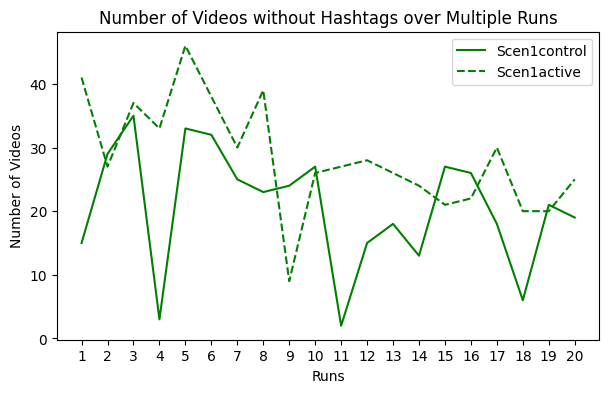

In [37]:
# scatterplot of videos without hashtags
fig, ax = plt.subplots(figsize=(7,4)) #change variable names later

#each scenario has the same color
#all control has solid line
#all active has dashed line

plt.plot(hash_summary(1)["run"], hash_summary(1)["%_videos_without_hash_control"], 
         color='green', linestyle='solid', label="Scen1control")
plt.plot(hash_summary(1)["run"], hash_summary(1)["%_videos_without_hash_active"], 
         color='green', linestyle='dashed', label="Scen1active")
#line style: [‘solid’ | ‘dashed’, ‘dashdot’, ‘dotted’ | (offset, on-off-dash-seq) | '-' | '--' | '-.' | ':' | 'None' | ' ' | '']

ax.set_title('Percent of Videos without Hashtags over Multiple Runs')
ax.set_xlabel('Runs')
ax.set_ylabel('Percent of Videos')

plt.yticks(np.arange(0, 50, 10)) #usually range is 0 to 1
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.show()


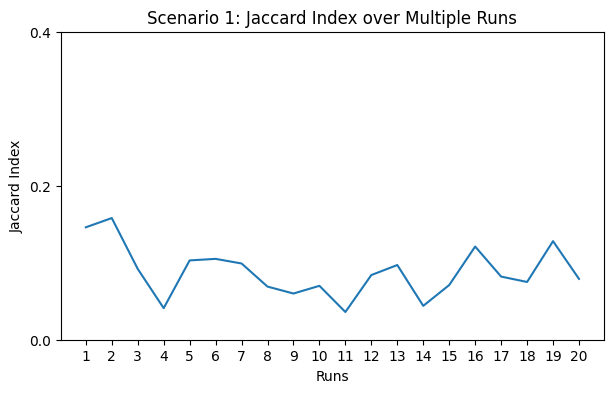

In [30]:
# plot similarities
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(hash_summary(1)["run"], hash_summary(1)["jaccard_index"])
ax.set_title('Scenario 1: Jaccard Index over Multiple Runs')
#ax.legend(loc='upper left') #maybe superimpose multiple scenarios?
ax.set_xlabel('Runs')
ax.set_ylabel('Jaccard Index')

plt.yticks(np.arange(0, 0.6,0.2)) #usually range is 0 to 1
plt.xticks(np.arange(1,21,1))
plt.show()



#to superimpose other scenarios, use this??
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4)) -- but this isn't on top of each other

#plt.plot(x, y1, label ='y1') ---- plot 1
#plt.plot(x, y2, '-.', label ='y2') ---- plot 2
#plt.xlabel("X-axis data")
#plt.ylabel("Y-axis data")
#plt.legend()

### 3.3.2 Hashtag Comparison (predefined vs actually liked)

In [ ]:
#to compare similarities between other hashtags that were not predefined but still appeared for similar posts)
#scen1_predefined_hash = set()
#scen1_active_like = set()

TODO: continue on

In [ ]:
## ANALYZING MUSIC ----------------------------------------------------------------------------------
mus = sc2["r1_control_all"].music.value_counts()
print(mus)




## ANALYZING AUTHOR ---------------------------------------------------------------------------------
aut = sc2["r1_control_all"].author.value_counts()
print(aut)

music
original sound - Gavin.kernstinee                              2
AIN'T GONNA ANSWER - NLE Choppa & Lil Wayne                    2
I Wouldnt Mind - ♱                                             1
original sound - Alex                                          1
som original - rinx                                            1
                                                              ..
original sound - fr0sty_rick                                   1
Monkeys Spinning Monkeys - Kevin MacLeod & Kevin The Monkey    1
Oi - My Soul Gone                                              1
original sound - Sam Middleton                                 1
original sound - squishiesophie                                1
Name: count, Length: 80, dtype: int64
author
mirandahshaul         2
didiios               1
dangmattsmith         1
vaynessvalery         1
wolf.spectrum         1
                     ..
leci.bby              1
madelineandstephen    1
radicalraphael        1
itz_justlola      